![alt text](image.png)

- متن خام میدن به اتوانکودر و جواب اونو میدن به شبکه عصبی

# Attention
## Transformer -> T gpt

![alt text](image-1.png)

- input embedding همون اتو انکودر 

In [10]:
import matplotlib.pyplot as plt
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model  

from keras.datasets import mnist

In [2]:
# برخلاف همیشه اول مدل میساختیم بعد لایه میدادیم الان لایه میسازیم بعد مدل

input = Input(shape=(784,))

encoded  = Dense(10,activation='relu')(input)  # هدف کاهش بعد 32 64
                    # هدف کلاسترینگ بود تعداد کلاس ها

decoded = Dense(784,activation='sigmoid')(encoded)


autoencoder = Model(input,decoded)
encoder  = Model(input,encoded)



encoded_input = Input(shape=(10,))
decoded_layar = autoencoder.layers[-1](encoded_input)
decoder  = Model(encoded_input,decoded_layar) #-> چون اینپوت نداره باید فیک بسازیم

autoencoder.compile('adam',loss='binary_crossentropy')

In [3]:
(x_train, _), (x_test, _) =mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train= x_train/255.0
x_test= x_test/255.0
x_train= x_train.reshape(-1,784)
x_test= x_test.reshape(-1,784)

In [6]:
x_train.shape

(60000, 784)

In [7]:
H = autoencoder.fit(x_train,x_train,validation_data=(x_test,x_test),epochs=30)

Epoch 1/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2117 - val_loss: 0.1674
Epoch 2/30
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1647 - val_loss: 0.1603
Epoch 3/30
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1598 - val_loss: 0.1568
Epoch 4/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1573 - val_loss: 0.1552
Epoch 5/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1561 - val_loss: 0.1544
Epoch 6/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1555 - val_loss: 0.1536
Epoch 7/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1550 - val_loss: 0.1535
Epoch 8/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1546 - val_loss: 0.1531
Epoch 9/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1543 - val_loss: 0.1528
Epoch 10/30
1875/1875 [==============================] - 22s 12ms/step

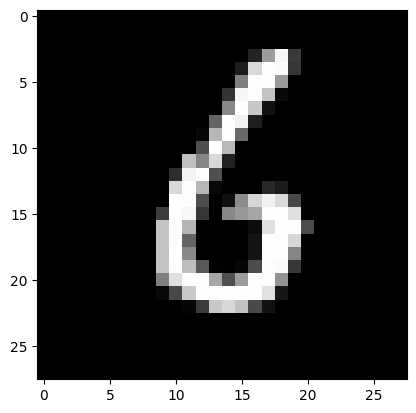

In [16]:
img = x_test[50]
plt.imshow(img.reshape(28,28),'gray');


In [17]:
encoded_img =  encoder.predict(img.reshape(1,-1))
encoded_img

1/1 [==============================] - 0s 442ms/step


array([[ 7.818609 ,  4.658303 ,  4.173977 ,  8.927332 ,  6.571169 ,
         0.7345541, 10.140398 ,  4.962452 ,  7.485314 ,  5.368667 ]],
      dtype=float32)

1/1 [==============================] - 0s 136ms/step


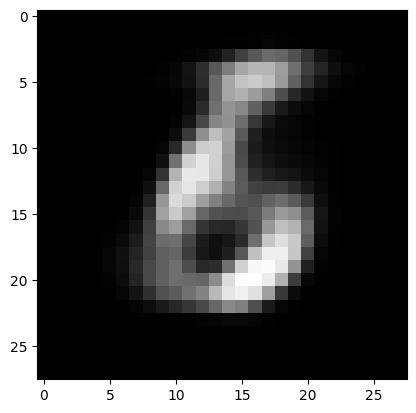

In [19]:
decoder_img = decoder.predict(encoded_img)
plt.imshow(decoder_img.reshape(28,28),'gray')

1/1 [==============================] - 0s 87ms/step


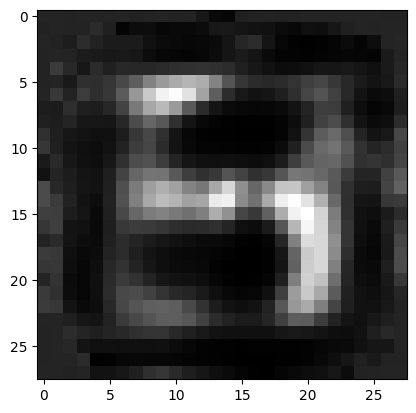

In [21]:
import numpy as np

data = np.random.normal(0.5,0.25,(1,10))
decoder_img = decoder.predict(data)
plt.imshow(decoder_img.reshape(28,28),'gray')